In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

import seaborn as sns
#import Evaluation as Evaluation
from sklearn.model_selection import train_test_split

In [4]:
# reading the csv file and giving the column names
electronics_df1 = pd.read_csv('ratings_Electronics.csv', header = None, names = ['userId', 'productId','ratings', 'timestamp'])

In [5]:
electronics_df1.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
electronics_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


- userId and product Id are strings as required.  Ratings and timestamp are integers

In [7]:
# Check for missing values present
print('Number of missing values across columns-\n', electronics_df1.isnull().sum())

Number of missing values across columns-
 userId       0
productId    0
ratings      0
timestamp    0
dtype: int64


In [8]:
# Check the number of rows and columns
rows, columns = electronics_df1.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  7824482
No of columns:  4


In [9]:
#summary statistic of ratings column
electronics_df1[['ratings']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


- As can be seen the mean and the 50% are 4.0 and 5.0 respectively.  It means that the users have rated the products highly
- There are no missing values for the ratings column

C:\Users\MURLI\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


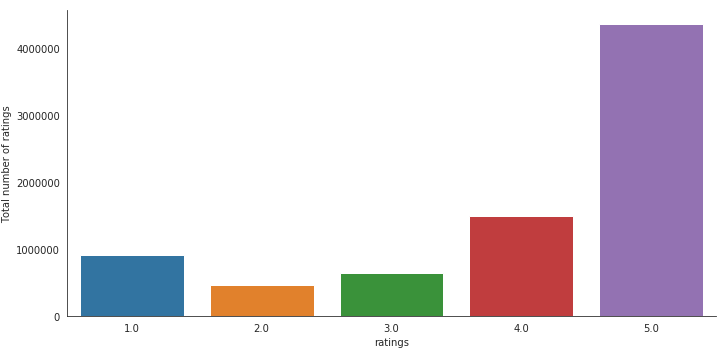

In [10]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=electronics_df1, aspect=2.0,kind = 'count')
    g.set_ylabels("Total number of ratings") 
    

In [11]:
#copying the original dataframe
electronics_df = electronics_df1.copy()

In [12]:
# As there is no use of the timestamp column in our analysis let us drop 
electronics_df.drop('timestamp', axis = 1, inplace = True)

In [13]:
electronics_df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [14]:

users_initial = electronics_df['userId'].unique()
products_initial = electronics_df['productId'].unique()

In [15]:
users_initial.shape
products_initial.shape

(4201696,)

(476002,)

- There are approx 42Lakh users rating 4.76Lakh products in the dataset

# Shrinking dataset as per requirement

In [16]:
#Removing users who have interacted less than threshold number of times
Threshold = 50
value_counts = electronics_df['userId'].value_counts()
to_remove = value_counts[value_counts < Threshold].index
electronics_df = electronics_df[~electronics_df['userId'].isin(to_remove)]
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


In [17]:
electronics_df['productId'].value_counts().tail()
electronics_df['userId'].value_counts().tail()

B004XVMAKU    1
B002NGJO1U    1
B00GHR2X8C    1
B0031W091E    1
B000LY8DBS    1
Name: productId, dtype: int64

AFM7FK7NFEKFZ     50
A274X54O9CN2SR    50
A2NXRD80LWHUOP    50
AOTZOHB2LZGYR     50
A2FZQF0MH29VYN    50
Name: userId, dtype: int64

In [18]:
users = electronics_df['userId'].unique()
products = electronics_df['productId'].unique()

In [19]:
users.shape
products.shape

(1540,)

(48190,)

In [20]:
# Top 10 users based on rating
most_active_users= electronics_df.groupby('userId').size().sort_values(ascending=False)[:10]
most_active_users

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

### calculate the density of the matrix

In [21]:
final_ratings_matrix = electronics_df.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [22]:
final_ratings_matrix.tail()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the data randomly into training and testing data

In [24]:
#Split the data into training and testing data in the ratio of 70/30
train_data, test_data = train_test_split(electronics_df, test_size = 0.3, random_state = 100)
print(train_data.head())

                 userId   productId  ratings
5993538   ANW6EGY12V5XS  B007ZW43IQ      4.0
4459175  A1QVFHPY8418HC  B004T9Y0MW      5.0
2177400   ALDAF4VVLFRHP  B001NOG2T0      4.0
232287   A11YIHB6IW352W  B00007KDVI      5.0
7811983  A3PD8JD9L4WEII  B00JGSWU7S      5.0


In [25]:
def shape():
    print("Test data shape: ", test_data.shape)
    print("Train data shape: ", train_data.shape)
shape() 

Test data shape:  (37762, 3)
Train data shape:  (88109, 3)


# Popularity based recommendation models (Non-Personalized)

In [26]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0594481813,1
1,0970407998,2
2,0972683275,2
3,1400501466,4
4,1400501520,1


In [27]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
30914,B0088CJT4U,136,1.0
8649,B000N99BBC,123,2.0
19601,B003ES5ZUU,119,3.0
30326,B007WTAJTO,117,4.0
31174,B008DWCRQW,104,5.0


In [28]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [29]:
find_recom = [112,600,200]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
   # print("The user is : %s\n" electronics[%(i)])
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 112

       userId   productId  score  Rank
30914     112  B0088CJT4U    136   1.0
8649      112  B000N99BBC    123   2.0
19601     112  B003ES5ZUU    119   3.0
30326     112  B007WTAJTO    117   4.0
31174     112  B008DWCRQW    104   5.0


Here is the recommendation for the userId: 600

       userId   productId  score  Rank
30914     600  B0088CJT4U    136   1.0
8649      600  B000N99BBC    123   2.0
19601     600  B003ES5ZUU    119   3.0
30326     600  B007WTAJTO    117   4.0
31174     600  B008DWCRQW    104   5.0


Here is the recommendation for the userId: 200

       userId   productId  score  Rank
30914     200  B0088CJT4U    136   1.0
8649      200  B000N99BBC    123   2.0
19601     200  B003ES5ZUU    119   3.0
30326     200  B007WTAJTO    117   4.0
31174     200  B008DWCRQW    104   5.0




In [30]:
print('Since this is a popularity-based recommender model, recommendations remain the same for all users')
print('\nRecommendations are given basing on popularity and they are not personalized')

Since this is a popularity-based recommender model, recommendations remain the same for all users

Recommendations are given basing on popularity and they are not personalized


# Collaborative filtering models

In [65]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.tail()

,index,userId,productId,ratings
125866,5862308,A2YEZ8Z3BW2SKG,B007Q8GOGI,4.0
125867,1292424,A1ZTR0FR5AW9B4,B000PO3CTM,1.0
125868,2864111,A1KY5G5FP31F2F,B002U42WUU,2.0
125869,697504,AMKNPIDFLRFMP,B000A1KCI4,5.0
125870,7334398,A10ZBR6O8S8OCY,B00CZ6WAEQ,3.0


In [67]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print(pivot_df.shape)
pivot_df.head()

(1540, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [69]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVD Method

In [70]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [72]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [73]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [74]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 200
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 200):

                   user_ratings  user_predictions
Recommended Items                                
B008X9Z8NE                  0.0          1.141688
B0079UAT0A                  0.0          1.101302
B008X9Z528                  0.0          1.072300
B004CLYEFK                  0.0          1.025798
B008X9Z7N0                  0.0          1.002051


### Evaluating model based collaborative filtering

In [76]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [78]:
# Predicted ratings 
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [79]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0594451647    0.001953
0594481813    0.002875
0970407998    0.003355
0972683275    0.010343
1400501466    0.004871
dtype: float64

In [80]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


In [81]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00275 



### Getting Top K recommendations for each user basing on his/her habbits

In [84]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 111
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 111):

                   user_ratings  user_predictions
Recommended Items                                
B004CLYEDC                  0.0          1.482331
B004CLYEE6                  0.0          1.151833
B0034CL2ZI                  0.0          1.138376
B005QCDY50                  0.0          0.983351
B0088CJT4U                  0.0          0.938928


# Collaborative filtering model using surprise package

In [31]:
#Collaborative filtering model using surprise package
from surprise import Dataset, Reader
reader = Reader(rating_scale = (1,5))


In [32]:
data = Dataset.load_from_df(electronics_df[['userId','productId', 'ratings']], reader)

In [33]:
data

In [34]:
from surprise.model_selection import train_test_split

In [35]:
trainset, testset = train_test_split(data, test_size = 0.3, random_state = 100)

In [36]:
#Accessing raw uid, raw iid in a surprise package
print(trainset.to_raw_uid(112))
print(trainset.to_raw_iid(1000))

A240FRPD4MEXND
B000GYW936


In [37]:
# Training the model
from surprise import SVD
from surprise import accuracy
from surprise import KNNWithMeans
from surprise import Prediction


### Collaboratinve filtering with KNN Means algorithm

In [38]:
KNNalgo = KNNWithMeans(k = 50, sim_options = {'name':'pearson', 'user_based' : True})
KNNalgo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [39]:
#Evaluating the test set
len(testset)
testset[0:5]

37762

[('A6FIAB28IS79', 'B004GV0HS4', 3.0),
 ('A1CMD08Z49PGKQ', 'B002JP16ZM', 5.0),
 ('A2EW01G2LNJN06', 'B004XMJKHA', 5.0),
 ('A20OBCQWBKCGZT', 'B00D8T886S', 3.0),
 ('AFXTKAO0CB354', 'B003SW13WQ', 5.0)]

In [40]:
#Evaluate on test set
test_pred = KNNalgo.test(testset)

In [41]:
#compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0478


1.047833483300977

In [42]:
#viewing predictions for particular user
test_pred[1000]

Prediction(uid='AZMY6E8B52L2T', iid='B00HA4ORMQ', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False})

In [43]:
test_pred[1000].est

5

In [44]:
#convert results into dataframe
test_pred_df = pd.DataFrame(test_pred)

In [45]:
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [46]:
test_pred_df[test_pred_df["was_impossible"]].head()

,uid,iid,r_ui,est,details,was_impossible
0,A6FIAB28IS79,B004GV0HS4,3.0,4.2623,"{'was_impossible': True, 'reason': 'User and/o...",True
1,A1CMD08Z49PGKQ,B002JP16ZM,5.0,4.2623,"{'was_impossible': True, 'reason': 'User and/o...",True
2,A2EW01G2LNJN06,B004XMJKHA,5.0,4.2623,"{'was_impossible': True, 'reason': 'User and/o...",True
4,AFXTKAO0CB354,B003SW13WQ,5.0,4.2623,"{'was_impossible': True, 'reason': 'User and/o...",True
5,A1522TN5FVJL0Y,B00005TQ0A,5.0,4.2623,"{'was_impossible': True, 'reason': 'User and/o...",True


In [47]:
len(testset)

37762

In [48]:
predictions = test_pred

In [49]:
predictions_df = pd.DataFrame([x.uid, x.iid, x.est] for x in predictions)

In [50]:
predictions_df.columns = ["userId", "productId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"], ascending = False, inplace = True)

In [51]:
predictions_df.head()
predictions_df.shape

,userId,productId,est_rating
1286,AZOK5STV85FBJ,B001TH7GUU,4.636364
1916,AZOK5STV85FBJ,B000O5N5AI,4.636364
5037,AZOK5STV85FBJ,B00068YUN4,4.636364
7656,AZOK5STV85FBJ,B00AANMVNQ,4.636364
8315,AZOK5STV85FBJ,B0002BA570,4.636364


(37762, 3)

In [52]:
top_5_recom_knn = predictions_df.groupby('userId').head(5).reset_index(drop = True)

In [53]:
top_5_recom_knn.shape

(7700, 3)

In [54]:
top_5_recom_knn.head(10)

,userId,productId,est_rating
0,AZOK5STV85FBJ,B001TH7GUU,4.636364
1,AZOK5STV85FBJ,B000O5N5AI,4.636364
2,AZOK5STV85FBJ,B00068YUN4,4.636364
3,AZOK5STV85FBJ,B00AANMVNQ,4.636364
4,AZOK5STV85FBJ,B0002BA570,4.636364
5,AZNUHQSHZHSUE,B000N99BBC,4.297561
6,AZNUHQSHZHSUE,B0002ZG62E,4.262300
7,AZNUHQSHZHSUE,B001DFZ5J2,4.262300
8,AZNUHQSHZHSUE,B000A6AXHE,4.262300
9,AZNUHQSHZHSUE,B0043IA6J0,4.262300


# SUMMARY

- A subset of the vast dataset is taken by considering only those users who have rated 50 or more times
- The dataset is divided into trainset and testset in 70/30 ratio
- Popularity based recommendation model is generaed which gives same set of recommendations for all the users
- Collaborative filtering model is generated using SVD method which gives personalized recommendation to each user basing on his/her past interactions
- Collaborative filtering model with surprise package is also obtained using KNNWithMeans algorithm and recommendations for different users given